In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [3]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print('GPU trouvé: {}'.format(tf.test.gpu_device_name()))
else:
    print("Aucun GPU trouvé")

2023-05-15 18:12:24.859422: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-15 18:12:24.860652: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 18:12:24.883452: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 18:12:24.883950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 18:12:25.246927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

Aucun GPU trouvé


2023-05-15 18:12:25.964419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 18:12:26.026577: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
import tensorflow as tf

print(tf.__version__)

2.12.0


In [16]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [11]:
import tensorflow as tf
tf.test.gpu_device_name ( )

2023-05-15 16:47:22.359677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 16:47:22.359762: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


''

In [2]:
import torch

if torch.cuda.is_available():
    print('GPU trouvé:', torch.cuda.get_device_name(0))
else:
    print("Aucun GPU trouvé")


GPU trouvé: NVIDIA GeForce RTX 3090


In [3]:
images = [] # liste pour stocker toutes les images
labels = [] # liste pour stocker les labels de chaque image

dataset_directory = "images"

for breed in os.listdir(dataset_directory):
    breed_directory = os.path.join(dataset_directory, breed)
    if os.path.isdir(breed_directory):
        for image_filename in os.listdir(breed_directory):
            img = cv2.imread(os.path.join(breed_directory, image_filename))
            if img is not None:
                images.append(img)
                labels.append(breed)

In [31]:
labels = np.array(labels)
np.unique(labels)

array(['n02085620-Chihuahua', 'n02085782-Japanese_spaniel',
       'n02085936-Maltese_dog', 'n02086079-Pekinese',
       'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel',
       'n02086910-papillon', 'n02087046-toy_terrier',
       'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound',
       'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound',
       'n02088632-bluetick', 'n02089078-black-and-tan_coonhound',
       'n02089867-Walker_hound', 'n02089973-English_foxhound',
       'n02090379-redbone', 'n02090622-borzoi',
       'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound',
       'n02091134-whippet', 'n02091244-Ibizan_hound',
       'n02091467-Norwegian_elkhound', 'n02091635-otterhound',
       'n02091831-Saluki', 'n02092002-Scottish_deerhound',
       'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier',
       'n02093428-American_Staffordshire_terrier',
       'n02093647-Bedlington_terrier', 'n02093754-Border_terrier',
       'n02093859-Kerry_blue

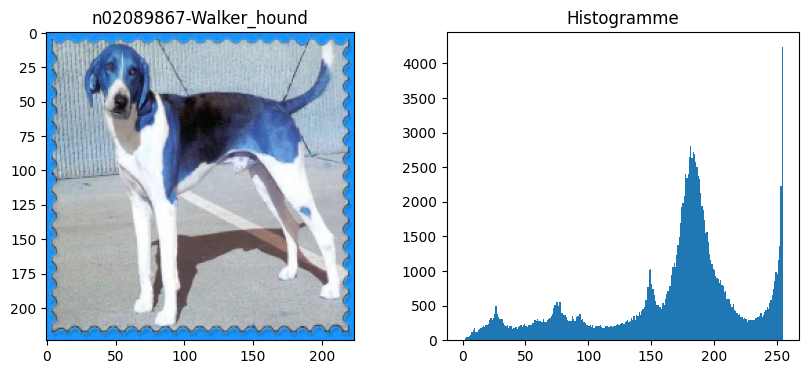

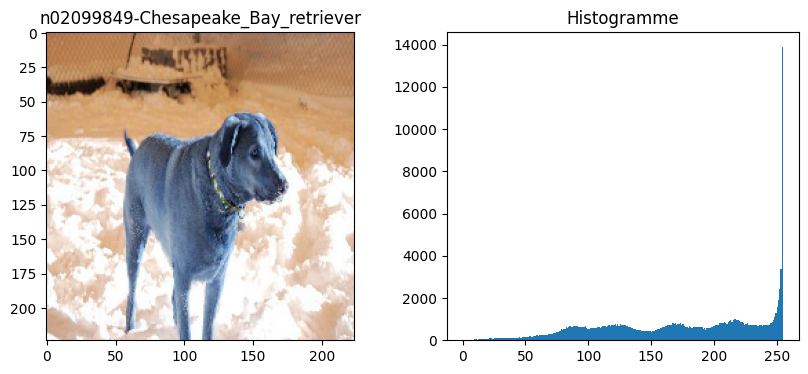

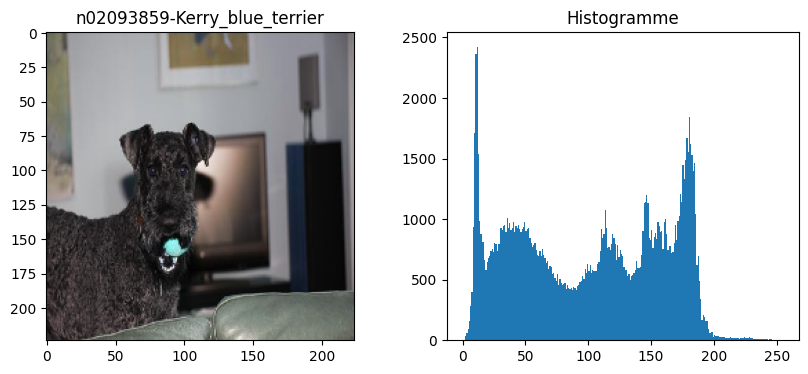

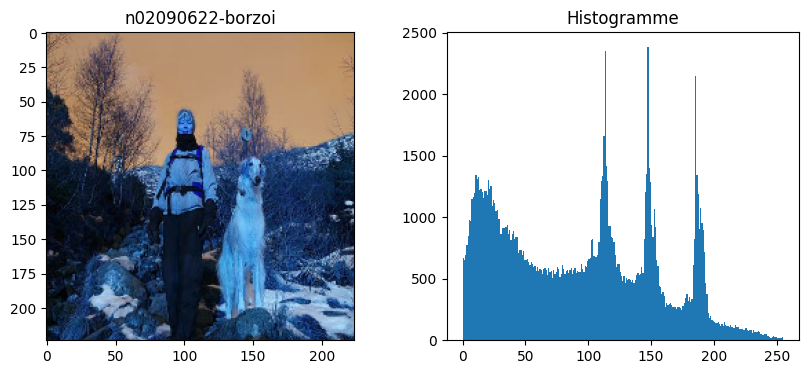

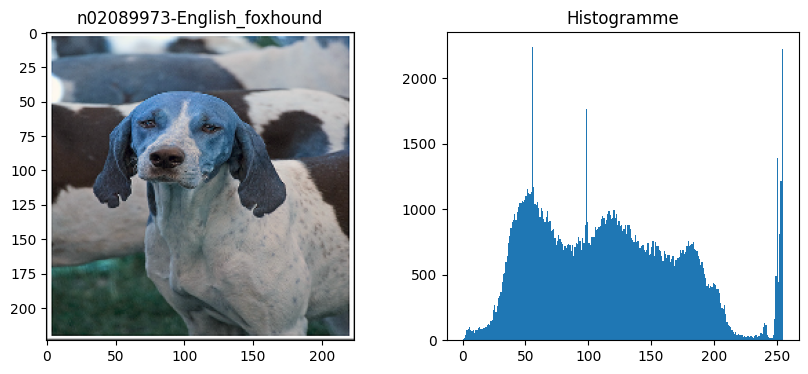

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Choisis un index au hasard dans le jeu de données
index = np.random.choice(np.arange(len(images)), size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.title('Histogramme')
    
    plt.show()

In [5]:
#Normalisation des images

for i in range(len(images)):
    images[i] = images[i] / 255.0

: 

: 

In [ ]:
# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
    plt.title('Histogramme')
    
    plt.show()

NameError: name 'index' is not defined

In [9]:
from PIL import ImageOps

# Convertir les images en images PIL et appliquer l'autocontraste
images_pil = [Image.fromarray((img * 255).astype(np.uint8)) for img in images]  # convertir en images PIL
images_pil = [ImageOps.autocontrast(img) for img in images_pil]  # appliquer l'autocontraste

: 

: 

In [ ]:
# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
    plt.title('Histogramme')
    
    plt.show()

In [8]:
# Égaliser l'histogramme des images
images_pil = [ImageOps.equalize(img) for img in images_pil]

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [ ]:
# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
    plt.title('Histogramme')
    
    plt.show()

In [1]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_ubyte, img_as_float

images_nl_means = []

for img in images_pil:
    img = img_as_float(img)  # convertir l'image en float
    sigma_est = np.mean(estimate_sigma(img, multichannel=True))  # estimer le bruit de l'image
    patch_kw = dict(patch_size=5,      # taille du patch 5x5
                    patch_distance=6,  # distance maximale à laquelle comparer le patch
                    multichannel=True)
    img_denoised = denoise_nl_means(img, h=1.15 * sigma_est, fast_mode=True, **patch_kw)
    img_denoised = img_as_ubyte(img_denoised)  # convertir l'image en uint8
    images_nl_means.append(img_denoised)

# Remplacer la liste d'images par la liste d'images débruitées
images = images_nl_means


ModuleNotFoundError: No module named 'skimage'

In [ ]:
# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
    plt.title('Histogramme')
    
    plt.show()

In [34]:
#Conversion des labels en encodage one-hot

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [33]:
from sklearn.model_selection import train_test_split

# Convertir les listes en numpy arrays
images = np.array(images)
labels = np.array(labels)

# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [7]:
import cv2
import os
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def process_images_from_directory(directory, batch_size):
    images = []
    labels = []
    count = 0

    for breed in os.listdir(directory):
        breed_directory = os.path.join(directory, breed)
        if os.path.isdir(breed_directory):
            for image_filename in os.listdir(breed_directory):
                img = cv2.imread(os.path.join(breed_directory, image_filename))
                if img is not None:
                    img = cv2.resize(img, (224, 224)) # redimensionner l'image
                    img = img / 255.0 # normaliser l'image
                    images.append(img)
                    labels.append(breed)
                    count += 1

                    # Si le nombre d'images atteint la taille du batch, traitez ce batch et commencez un nouveau batch
                    if count >= batch_size:
                        yield np.array(images), np.array(labels)
                        images = []
                        labels = []
                        count = 0

    # Traitez le dernier batch qui pourrait être inférieur à la taille du batch
    if count > 0:
        yield np.array(images), np.array(labels)


In [8]:
# Utilisation de la fonction
directory = "images"
batch_size = 256 # Choisissez une taille de batch qui convient à votre machine

for images, labels in process_images_from_directory(directory, batch_size):
    # Utilisez ici les images et les labels pour former votre modèle
    lb = LabelBinarizer()
    labels = lb.fit_transform(labels)
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

AxisError: axis 1 is out of bounds for array of dimension 1

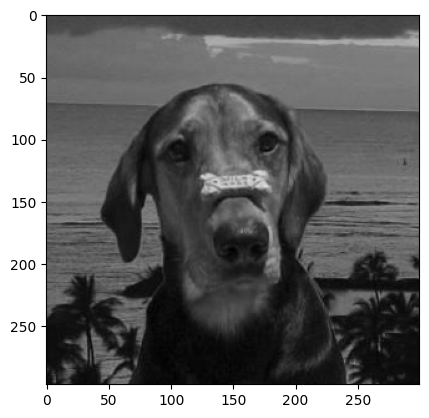

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Choisissez un index au hasard dans votre jeu de données
index = np.random.choice(np.arange(len(X_train)), size=5, replace=False)

# Affichez les images et leurs labels correspondants
for i in index:
    plt.figure()
    plt.imshow(X_train[i])
    plt.title(f'Label: {lb.inverse_transform(np.array([y_train[i]]))[0]}')  # Utilisez inverse_transform pour obtenir le label de la classe
    plt.show()

In [19]:
y_train.shape

(80, 1)

In [10]:
#Construction du modèle

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(np.unique(y_train)) # nombre de races de chiens

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) # La dernière couche a un nombre de neurones égal au nombre de classes

In [11]:
#Compilation du modèle

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
#Entraînement du modèle

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/home/lolonois/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 404ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10


/home/lolonois/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 298ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 300ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 312ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 298ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 1s 297ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 1s 310ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 1s 292ms/step - loss: 0.0

In [13]:
#Evaluation du modèle

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

1/1 [==============================] - 0s 40ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Loss: 0.0
Accuracy: 0.0


In [14]:
#Sauvegarde du modèle

model.save('models/model.h5')